In [1]:
#include all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#inp_train = pd.read_csv('Dataset/sign_mnist_train.csv')
#load dataset - this time we only use train
train_set = pd.read_csv('Dataset/sign_mnist_train.csv')
test_set = pd.read_csv('Dataset/sign_mnist_test.csv')

In [ ]:
train_set.shape

In [ ]:
train_set['label'].values

In [3]:
#ori_labels = inp_train['label'].values
#set label value
label_train = train_set['label'].values

In [10]:
#check wether label_train is correct
np.array(label_train)

array([ 3,  6,  2, ..., 18, 17, 23], dtype=int64)

In [8]:
#make label as unique value
unique_train_val = np.array(label_train)
np.unique(unique_train_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [6]:
#let train is only train dataset
train_set.drop('label', axis = 1, inplace = True)

In [9]:
#np.array(label_train)
train_set.shape

(27455, 785)

In [7]:
#reshape each data into 28 X 28 array of data
images = train_set.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [ ]:
images.shape

In [ ]:
images[0].shape

In [ ]:
#example of image that just resized
plt.imshow(images[0].reshape(28,28))

In [ ]:
#this is label before binarized
label_train

In [13]:
#binarize label because our label is nominal
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
label_train = label_binrizer.fit_transform(label_train)

In [16]:
#make sure binarized label is done
#label_train

unique_train_val = np.array(label_train)
np.unique(unique_train_val)

array([0, 1])

In [14]:
label_train.shape

(27455, 24)

In [ ]:
train_set.shape

In [ ]:
label_train[0]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
#split train and test to build model
x_train, x_test, y_train, y_test = train_test_split(images, label_train, test_size = 0.35, random_state = 101)

In [11]:
#now lets continue to CNN method
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

Using TensorFlow backend.


In [29]:
#set some parameters
batch_size = 128
num_classes = 24
epochs = 10#20#50

In [13]:
#normalize dataset
x_train = x_train / 255
x_test = x_test / 255

In [14]:
#and put it back to 28 x 28 pixel array
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
#let see image after its normalized
plt.imshow(x_train[1].reshape(28,28))

In [ ]:
#setup CNN network _ this is original
model = Sequential()
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [15]:
#source: https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d
#setup CNN network single layer
cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28 ,1)))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(24, activation='softmax'))

cnn1.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
#setup CNN network 3 layer
cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28 ,1)))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(24, activation='softmax'))

cnn3.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#setup CNN network 4 layer
cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28 ,1)))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(24, activation='softmax'))

cnn4.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
#this is from towardsdatascience
cnn1 = Sequential([
    Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same',input_shape=(28, 28 ,1)),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(24, activation='softmax')
])

In [ ]:
cnn1.summary()

In [ ]:
#this is from peculiar-endeavours.com

# Create model architecture
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding="same", activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(24, activation="softmax"))
    
    # Compile the model
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])


In [ ]:
y_train.shape[1:]

In [ ]:
print("CNN architecture:")
model.summary()

In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#cnn with 3 layer


In [ ]:
#cnn with 4 layer


In [ ]:
#old one
cnn1.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

In [ ]:
x_train

In [ ]:
history1 = cnn1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

In [30]:
history = cnn1.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 17845 samples, validate on 9610 samples
Epoch 1/10
17845/17845 [==============================] - 10s 568us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 2/10
17845/17845 [==============================] - 10s 556us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 3/10
17845/17845 [==============================] - 12s 675us/step - loss: 0.0033 - acc: 0.9999 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 4/10
17845/17845 [==============================] - 10s 574us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.00000s - loss: 0.0024 - acc:
Epoch 5/10
17845/17845 [==============================] - 10s 582us/step - loss: 0.0021 - acc: 0.9999 - val_loss: 0.0016 - val_acc: 0.9999
Epoch 6/10
17845/17845 [==============================] - 10s 576us/step - loss: 0.0024 - acc: 0.9999 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 7/10
17845/17845 [==============================] - 11s 617us/step - loss: 0.0018 - acc

In [40]:
#Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(x_train, y_train, batch_size=256)
val_batches = gen.flow(x_test, y_test, batch_size=256)

In [ ]:
cnn1.summary()

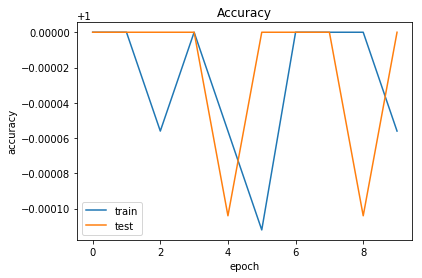

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [20]:
#Test session guys
label_test = test_set['label']

In [21]:
test_set.drop('label', axis = 1, inplace = True)

In [22]:
test_images = test_set.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [23]:
label_test = label_binrizer.fit_transform(label_test)

In [24]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [32]:
#y_pred = model.predict(test_images)
y_pred = cnn1.predict(test_images)
#y_pred = cnn3.predict(test_images)
#y_pred = cnn4.predict(test_images)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
#original form
accuracy_score(label_test, y_pred.round())

0.7126324595649749

In [ ]:
score1 = cnn1.evaluate(test_images, label_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])